支持向量机（简称SVM）是一个功能强大并且全面的机器学习模型，它能够执行线性或非线性分类、回归，甚至是异常值检测任务。它是机器学习领域最受欢迎的模型之一，任何对机器学习感兴趣的人都应该在工具箱中配备一个。SVM特别适用于中小型复杂数据集的分类。

本章介绍不同SVM的核心概念，怎么使用它们以及它们的工作原理。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 线性SVM分类

SVM的基本思想可以用一些图来说明。图5-1所示的数据集来自第4章末尾引用的鸢尾花数据集的一部分。两个类别可以轻松地被一条直线（它们是线性可分离的）分开。左图显示了三种可能的线性分类器的决策边界。其中虚线所代表的模型表现非常糟糕，甚至都无法正确实现分类。其余两个模型在这个训练集上表现堪称完美，但是它们的决策边界与实例过于接近，导致在面对新实例时，表现可能不会太好。相比之下，右图中的实线代表SVM分类器的决策边界，这条线不仅分离了两个类别，并且尽可能远离了最近的训练实例。可以将SVM分类器视为在类别之间拟合可能的最宽的街道（平行的虚线所示）。因此这也叫作大间隔分类（large margin classification）。

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

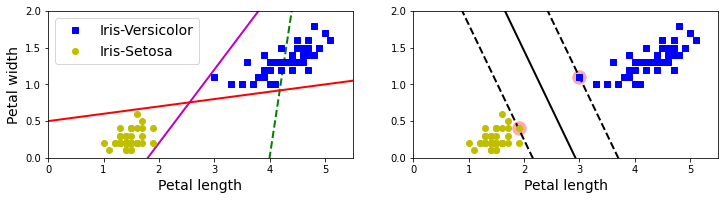

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#save_fig("large_margin_classification_plot")
plt.show()

请注意，在街道以外的地方增加更多训练实例，不会对决策边界产生影响：也就是说它完全由位于街道边缘的实例所决定（或者称之为“支持”）。这些实例被称为支持向量（在图5-1中已圈出）。

> SVM对特征的缩放非常敏感，如图5-2所示，在左图中，垂直刻度比水平刻度大得多，因此可能的最宽的街道接近于水平。在特征缩放（例如使用Scikit-Learn的StandardScaler）后，决策边界看起来好很多（见右图）。

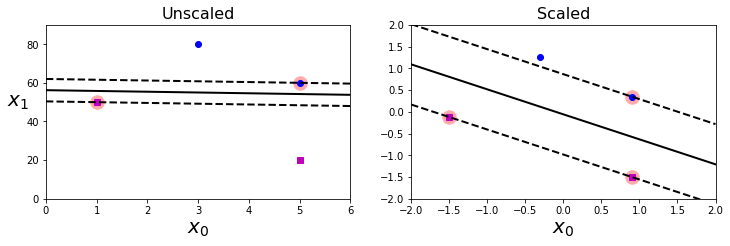

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# save_fig("sensitivity_to_feature_scales_plot")
plt.show()

### 软间隔分类

如果严格地让所有实例都不在街道上，并且位于正确的一边，这就是`硬间隔分类`。

> 硬间隔分类有两个主要问题，首先，它只在数据是线性可分离的时候才有效；其次，它对异常值非常敏感。

下图显示了有一个额外异常值的鸢尾花数据：左图的数据根本找不出硬间隔，而右图最终显示的决策边界与我们在上图中所看到的无异常值时的决策边界也大不相同，可能无法很好地泛化。

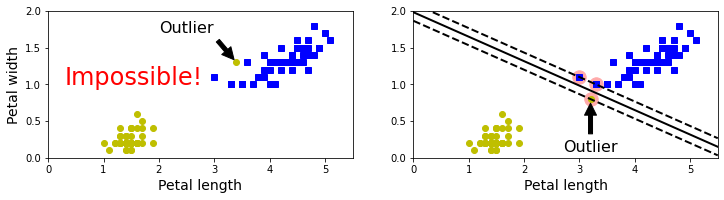

In [6]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# 此处的C设置为一个极大的值，硬间隔
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

#save_fig("sensitivity_to_outliers_plot")
plt.show()

要避免这些问题，最好使用更灵活的模型。目标是尽可能在保持街道宽阔和限制间隔违例（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡，这就是软间隔分类。

在Scikit-Learn的SVM类中，可以通过超参数C来控制这个平衡：**C值越小，则街道越宽，但是间隔违例也会越多**。下图显示了在一个非线性可分离数据集上，两个软间隔SVM分类器各自的决策边界和间隔。右边使用了高C值，分类器的间隔违例较少，但是间隔也较小。左边使用了低C值，间隔大了很多，但是位于街道上的实例也更多。看起来第一个分类器的泛化效果更好，因为大多数间隔违例实际上都位于决策边界正确的一边，所以即便是在该训练集上，它做出的错误预测也会更少。

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [9]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [10]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

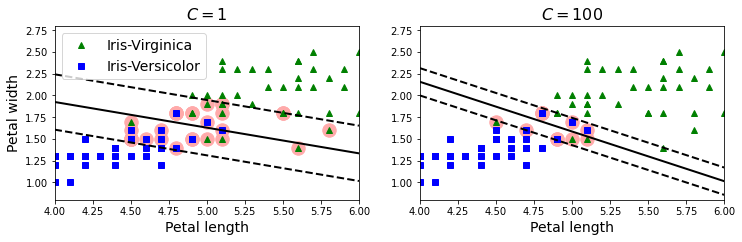

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# save_fig("regularization_plot")
plt.show()

> 如果SVM模型过度拟合，可以试试通过降低C来进行正则化。

下面这段Scikit-Learn代码：加载鸢尾花数据集，缩放特征，然后训练一个线性SVM模型（使用LinearSVC类，C=0.1，用即将介绍的hinge损失函数）用来检测Virginica鸢尾花。得到的模型如图5-4右图所示。

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ))

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

然后，按照惯例，可以用模型做出预测：

In [14]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

> 与Logistic回归分类器不同的是，SVM分类器不会输出每个类别的概率。

或者，还可以选择SVC类，使用`SVC(kernel="linear"，C=1)`，但是这要**慢得多**，特别是对于大型训练集而言，因此不推荐使用。另一个选择是`SGDClassifier`类，使用`SGDClassifier(loss="hinge"，alpha=1/(m*C))`。这适用于常规随机梯度下降（参见第4章）来训练线性SVM分类器。它不会像LinearSVC类那样快速收敛，但是对于内存处理不了的大型数据集（核外训练）或是在线分类任务，它非常有效。

> LinearSVC类会对偏置项进行正则化，所以需要先减去平均值，使训练集集中。如果使用`StandardScaler`会自动进行这一步。此外，请确保超参数loss设置为"hinge"，因为它不是默认值。最后，为了获得更好的性能，还应该将超参数`dual`设置为False，除非特征数量比训练实例还多。

## 非线性SVM分类

虽然在许多情况下，线性SVM分类器是有效的，并且通常出人意料的好，但是，有很多数据集远不是线性可分离的。处理非线性数据集的方法之一是添加更多特征，比如多项式特征（如第4章所述），某些情况下，这可能导致数据集变得线性可分离。参见下图的左图：这是一个简单的数据集，只有一个特征$x_1$ ，可以看出，数据集线性不可分。但是如果添加第二个特征$x_2 =x_1^2$ ，生成的2D数据集则完全线性可分离。

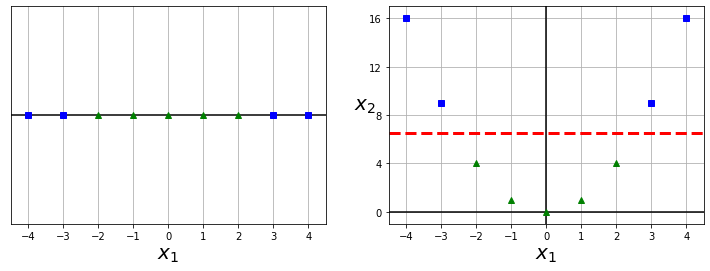

In [15]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

# save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

要使用Scikit-Learn实现这个想法，可以搭建一条流水线：一个PolynomialFeatures转换器，接着一个StandardScaler，然后是LinearSVC。用卫星数据集来测试一下：

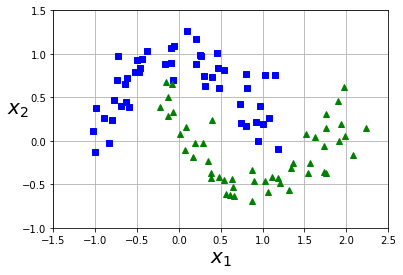

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=55)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

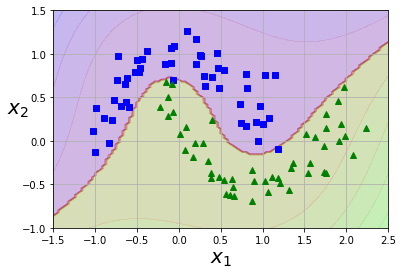

In [20]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

### 多项式核

添加多项式特征实现起来非常简单，并且对所有的机器学习算法（不只是SVM）都非常有效。但问题是，如果多项式太低阶，处理不了非常复杂的数据集，而高阶则会创造出大量的特征，导致模型变得太慢。

幸运的是，使用SVM时，有一个魔术般的数学技巧可以应用，这就是核技巧。它产生的结果就跟添加了许多多项式特征，甚至是非常高阶的多项式特征一样，但实际上并不需要真的添加。因为实际没有添加任何特征，所以也就不存在数量爆炸的组合特征了。这个技巧由SVC类来实现，我们看看在卫星数据集上的测试：

In [21]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

这段代码使用了一个3阶多项式内核训练SVM分类器。如下图的左图所示。而右图是另一个使用了10阶多项式核的SVM分类器。显然，如果模型过度拟合，你应该降低多项式阶数；反过来，如果拟合不足，则可以尝试使之提升。超参数`coef0`控制的是模型受高阶多项式还是低阶多项式影响的程度。

In [22]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

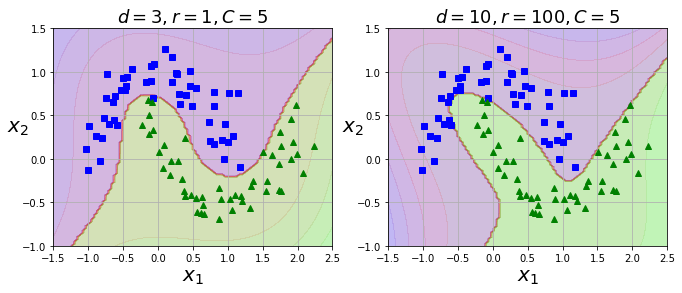

In [23]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

> 寻找正确的超参数值的常用方法是网格搜索。先进行一次粗略的网格搜索，然后在最好的值附近展开一轮更精细的网格搜索，这样通常会快一些。多了解每个超参数实际上是用来做什么的，有助于在超参数空间层正确搜索。

### 添加相似特征

解决非线性问题的另一种技术是添加相似特征。这些特征经过相似函数计算得出，相似函数可以测量每个实例与一个特定地标（landmark）之间的相似度。以前面提到过的一维数据集为例，在$x_1 =-2$和$x_1 =1$处添加两个地标（见图5-8中的左图）。接下来，我们采用高斯径向基函数（RBF）作为相似函数，$\gamma=0.3$（见等式5-1）。

$$
\phi \gamma(x, \ell) = \exp(-\gamma||x-\ell||^2) \tag{5-1} \label{}
$$

这是一个从0（离地标差得非常远）到1（跟地标一样）变化的钟形函数。现在我们准备计算新特征。例如，看实例$x_1 =-1$：它与第一个地标的距离为1，与第二个地标的距离为2。因此它的新特征为$x_2 =\exp（-0.3×1^2 ）\approx 0.74$，%x_3 =exp（-0.3×2^2 ）\approx 0.30$。下图的右图显示了转换后的数据集（去除了原始特征），现在可以看出，数据呈线性可分离的了。

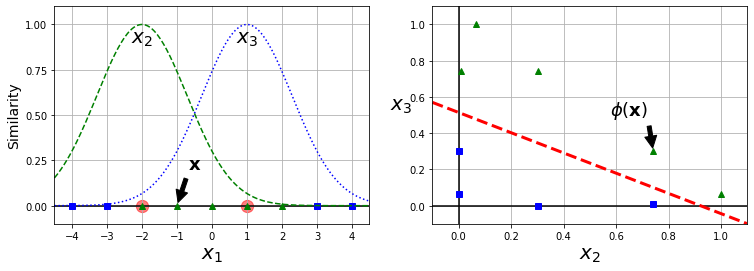

In [26]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

# save_fig("kernel_method_plot")
plt.show()

怎么选择地标呢？最简单的方法是在数据集里每一个实例的位置上创建一个地标。这会创造出许多维度，因而也增加了转换后的训练集线性可分离的机会。缺点是，一个有m个实例n个特征的训练集会被转换成一个m个实例m个特征的训练集（假设抛弃了原始特征）。如果训练集非常大，那就会得到同样大数量的特征。

### 高斯RBF核函数

与多项式特征方法一样，相似特征法也可以用任意机器学习算法，但是要计算出所有附加特征，其计算代价可能非常昂贵，尤其是对大型训练集来说。然而，核技巧再一次施展了它的SVM魔术：它能够产生的结果就跟添加了许多相似特征一样，但实际上也并不需要添加。使用SVC类试试高斯RBF核：

In [27]:
rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

下图的左下方显示了这个模型。其他图显示了超参数gamma和C使用不同值时的模型。增加gamma值会使钟形曲线变得更窄（图5-8的左图），因此每个实例的影响范围随之变小：决策边界变得更不规则，开始围着单个实例绕弯。反过来，减小gamma值使钟形曲线变得更宽，因而每个实例的影响范围增大，决策边界变得更平坦。所以就像是一个正则化的超参数：模型过度拟合，就降低它的值，如果拟合不足则提升它的值（类似超参数C）。

还有一些其他较少用到的核函数，例如专门针对特定数据结构的核函数。字符串核常用于文本文档或是DNA序列（如使用字符串子序列核或是基于莱文斯坦距离的核函数）的分类。

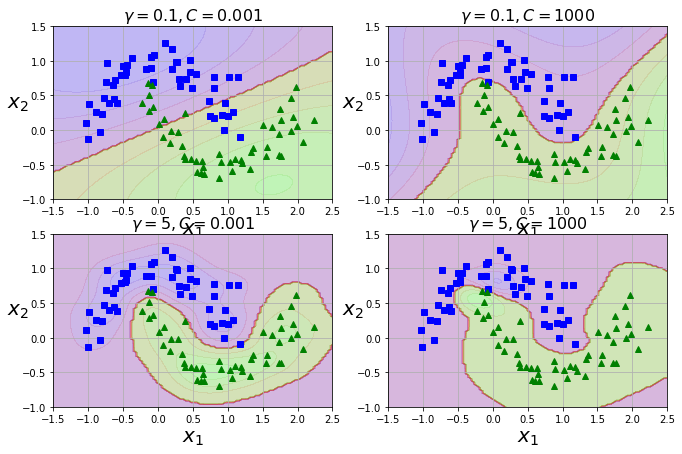

In [28]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# save_fig("moons_rbf_svc_plot")
plt.show()

> 有这么多的核函数，该如何决定使用哪一个呢？有一个经验法则是，永远先从线性核函数开始尝试（要记住，`LinearSVC`比`SVC(kernel="linear")`快得多），特别是训练集非常大或特征非常多的时候。如果训练集不太大，可以试试高斯RBF核，大多数情况下它都非常好用。如果还有多余的时间和计算能力，可以使用交叉验证和网格搜索来尝试一些其他的核函数，特别是那些专门针对你的数据集数据结构的核函数。

### 计算复杂度

liblinear库为线性SVM实现了一个优化算法， [1] LinearSVC正是基于该库的。这个算法不支持核技巧，不过它与训练实例的数量和特征数量几乎呈线性相关：其训练时间复杂度大致为$O(m \times n)$。

如果你想要非常高的精度，算法需要的时间更长。它由容差超参数（在Scikit-Learn中为tol）来控制。大多数分类任务中，默认的容差就够了。

SVC则是基于libsvm库的，这个库的算法支持核技巧。 [2] 训练时间复杂度通常在$O(m^2 \times n)$和$O(m^3 \times n)$之间。很不幸，这意味着如果训练实例的数量变大（例如上十万个实例），它将会慢得可怕，所以这个算法完美适用于复杂但是中小型的训练集。但是，它还是可以良好适应地特征数量的增加，特别是应对稀疏特征（即，每个实例仅有少量的非零特征）。在这种情况下，算法复杂度大致与实例的平均非零特征数成比例。表5-1比较了Scikit-Learn的SVM分类器类别。

|类|时间复杂度|是否支持核外|是否需要缩放|核技巧|
|-|-|-|-|-|
|LinearSVC|$O(m \times n)$|否|是|否|
|SGDClassifier|$O(m \times n)$|是|是|否|
|SVC|$O(m^2 \times n)$ 到 $O(m^3 \times n)$|否|是|是|

[1] “针对大型线性SVM的双坐标下降法”（“A Dual Coordinate Descent Method for Large-scale Linear SVM，”），Lin等人（2008）。

[2] “序列最小优化”（Sequential Minimal Optimization），J.Platt(1998)。

## SVM回归

正如前面提到的，SVM算法非常全面：它不仅支持线性和非线性分类，而且还支持线性和非线性回归。诀窍在于将目标反转一下：不再是尝试拟合两个类别之间可能的最宽的街道的同时限制间隔违例，SVM回归要做的是让尽可能多的实例位于街道上，同时限制间隔违例（也就是不在街道上的实例）。街道的宽度由超参数$\epsilon$控制。下图显示了用随机线性数据训练的两个线性SVM回归模型，一个间隔较大（$\epsilon = 1.5$），另一个间隔较小（$\epsilon = 0.5$）。

In [29]:
np.random.seed(55)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [31]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

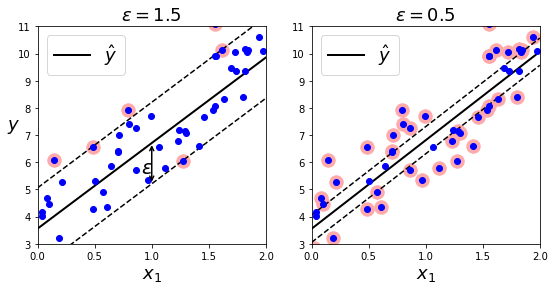

In [34]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
# plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

在间隔内添加更多的实例不会影响模型的预测，所以这个模型被称为$\epsilon$不敏感。

可以使用Scikit-Learn的LinearSVR类来执行线性SVM回归。以下代码生成如上图左图所示的模型（训练数据需要先缩放并集中）：

In [35]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

要解决非线性回归任务，可以使用核化的SVM模型。例如，图5-11显示了在一个随机二次训练集上，使用二阶多项式核的SVM回归。左图几乎没有正则化（C值很大），右图则过度正则化（C值很小）。

In [38]:
np.random.seed(55)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

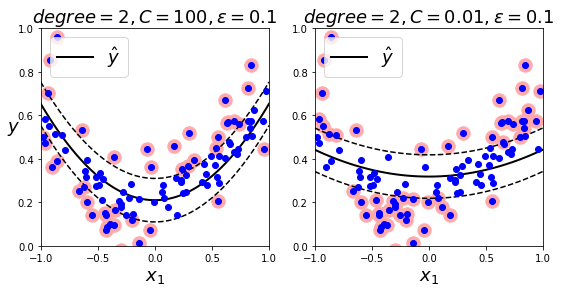

In [43]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()

以下代码使用Scikit-Learn的SVR类（支持核技巧）生成如图5-11左图所示的模型。SVR类是SVC类的回归等价物，LinearSVR类也是LinearSVC类的回归等价物。LinearSVR与训练集的大小线性相关（跟LinearSVC一样），而SVR则在训练集变大时，变得很慢（SVC也是一样）。

In [44]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

SVM也可用于异常值检测：详细信息请参考Scikit-Learn文档。

## 工作原理

本节将会介绍SVM如何进行预测，以及它们的训练算法是如何工作的，从线性SVM分类器开始。如果你刚刚开始接触机器学习，可以安全地跳过本节，直接进入本章末尾的练习，等到想要更深入地了解SVM时再回来也不迟。

首先，说明一下符号：在第4章里，我们使用过一个约定——将所有模型参数放在一个向量$\theta$中，包括偏置项$\theta_0$ ，以及输入特征的权重$\theta_1$ 到$\theta_n$ ，同时在所有实例中添加偏置项$x_0 =1$。将会使用另一个约定，在处理SVM时它更为方便（也更常见）：偏置项表示为$b$，特征权重向量表示为$w$，同时输入特征向量中不添加偏置特征。

### 决策函数和预测

线性SVM分类器通过简单地计算决策函数$w^T \cdot x + b = w_1x_1 + \dots + w_nx_n +b$来预测新实例$x$的分类。如果结果为正，则预测类别$\hat y$是正类（1），不然则预测其为负类（0），见公式5-2。

$$
\hat y = \left \{ 
    \begin{array}{c}
        0 & if & w^T \cdot x + b < 0  \\
        1 & if & w^T \cdot x +b \ge 0
    \end{array}
    \right.
    \tag{5-2} \label{5-2}
$$

下图显示了图5-4右侧的模型所对应的决策函数：数据集包含两个特征（花瓣宽度和长度），所以是一个二维平面。决策边界是决策函数等于0的点的集合：它是两个平面的交集，也就是一条直线（加粗实线所示）。 [1]

In [45]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

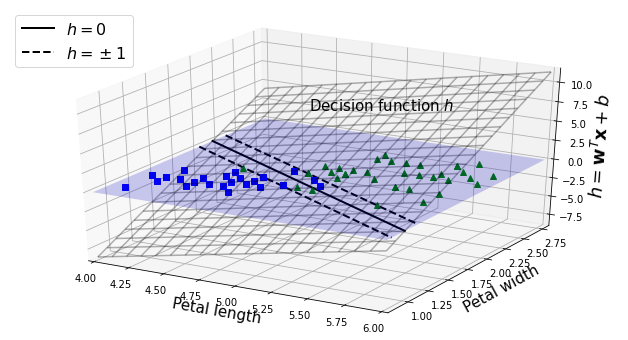

In [46]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

#save_fig("iris_3D_plot")
plt.show()

虚线表示决策函数等于1或-1的点：它们互相平行，并且与决策边界的距离相等，从而形成了一个间隔。训练线性SVM分类器即意味着找到$w$和$b$的值，从而使这个间隔尽可能宽的同时，避免（硬间隔）或是限制（软间隔）间隔违例。

[1] 更概括地说，当有$n$个特征时，决策函数是一个$n$维的超平面，决策边界是一个($n-1$)维的超平面。

## 训练目标

思考一下决策函数的斜率：它等于权重向量的范数，即$||w||$。如果将斜率除以2，那么决策函数等于$\pm 1$的点也将变得离决策函数两倍远。也就是说，将斜率除以2，将会使间隔乘以2。也许2D图更容易将其可视化，见下图。权重向量$w$越小，间隔越大。

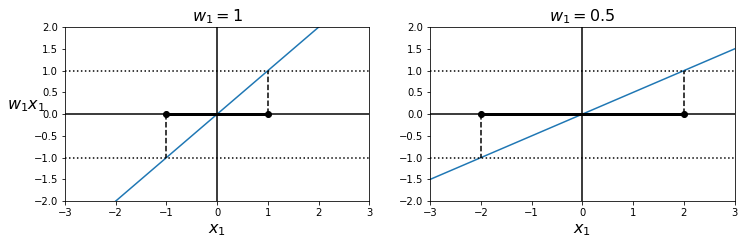

In [48]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
# save_fig("small_w_large_margin_plot")
plt.show()

所以要最小化$||w||$来得到尽可能大的间隔。但是，如果想避免任何间隔违例（硬间隔），那么就要使所有正类训练集的决策函数大于1，负类训练集的决策函数小于-1。如果定义，实例为负类（如果$y^{(i)} = 0$）时，$t^{(i)} = -1$；实例为正类（如果$y^{(i)} = 1$）时，t （i） =1。那么我们就可以将这个约束条件表示为：对所有实例来说，$t^{(i)}(w^T \cdot x^{(i)} + b) \ge 1$。

因此，可以将硬间隔线性SVM分类器的目标，看作一个约束优化问题，如公式5-3所示。

$$
\min_{w,b} \frac{1}{2}w^T \cdot w \\
使得 t^{(i)}(w^T \cdot x^{(i)} +b \ge 1 ) \; (i =1,2,\dots,m) \tag{5-3} \label{5-3}
$$


> 最小化的是$\frac {w^T \cdot w}2$，它等于$\frac {||w||^2} 2$，而不是最小化$||w||$。这是因为，二者虽然会得到同样的结果（因为让某个值最小的$w$和$b$，同样也使其平方的一半最小），但是$\frac {||w||^2} 2$有一个简单好用的导数（就是$w$），而$||w||$在$w = 0$时，是不可微的。优化算法在可微函数上的工作效果要好得多。

要达到软间隔的目标，需要为每个实例引入一个松弛变量$\zeta^{(i)} \ge 0$， [1] $\zeta^{(i)}$衡量的是第$i$个实例多大程度上允许间隔违例。那么现在有了两个互相冲突的目标：使松弛变量越小越好从而减少间隔违例，同时还要使$\frac {w^T \cdot w}2$最小化以增大间隔。这正是超参数`C`的用武之地：允许在两个目标之间权衡。公式5-4给出了这个约束优化问题。

$$
\min_{w,b,\zeta} \frac{1}{2}w^T \cdot w + C \sum_{i=1}^m \zeta^{(i)} \\
使得 t^{(i)}(w^T \cdot x^{(i)} +b \ge 1 - \zeta^{(i)} ) 且 \zeta^{(i)} \ge 0 \; (i =1,2,\dots,m) \tag{5-4} \label{5-4}
$$

### 二次规划

硬间隔和软间隔问题都属于线性约束的凸二次优化问题。这类问题被称为二次规划（QP）问题。要解决二次规划问题有很多现成的求解器，使用到的技术各不相同，这些不在讨论范围之内。 [2] 公式5-5给出的是问题的一般形式。

$$
\min_p \frac{1}{2} p^T \cdot H \cdot p + f^T \cdot p \\
使得 A \cdot p \le b \\
其中\left \{
\begin{array}{l}
p是一个n_p维向量(n_p为参数数量) \\
H是一个n_p \times n_p 矩阵 \\
f是一个n_p维向量 \\
A是一个n_c \times n_p 矩阵(n_c为约束数量) \\
b是一个n_c 维向量 \\
\end{array} \right.
 \tag{5-5} \label{5-5}
$$


注意表达式$A \cdot p \le b$实际上定义了$n_c$个约束：对于$i=1,2,\dots,n_c ，p^T \cdot a^{(i)} \le b^{(i)}$，其中$a^{(i)}$是包含$A$的第$i$行元素的向量，而$b^{(i)}$ 是$b$的第$i$个元素。

可以轻松验证一下，如果把二次规划参数按以下方式设置，能够实现硬间隔线性SVM分类器的目标：

* $n_p = n+1$，其中$n$为特征数量（+1是偏置项）。
* $n_c = m$，其中m是训练实例的数量。
* $H$是$n_p \times n_p$的单位矩阵，但是顶左单元格为零（为了忽略偏置项）。
* $f=0$，一个全是0的$n_p$维向量。
* $b=1$，一个全是1的$n_c$维向量。
* $a^{(i)} = -t^{(i)} \dot x^{(i)}$，其中$\dot x^{(i)}$等于$x^{(i)}$，除了一个额外的偏置特征$\dot x^{(0)} = 1$。

所以，要训练硬间隔线性SVM分类器，有一种办法是直接将上面的参数用在一个现成的二次规划求解器上。得到的向量$p$将会包括偏置项$b=p_0$ ，以及特征权重$w_i = p_i ，i=1,2,\dots,m$。类似地，也可以用二次规划求解器来解决软间隔问题。

但是，为了运用核技巧，接下来将要看一个不同的约束优化问题。

### 对偶问题

针对一个给定的约束优化问题，称之为`原始问题`，常常可以用另一个不同的，但是与之密切相关的问题来表达，这个问题称之为`对偶问题`。通常来说，对偶问题的解只能算是原始问题的解的下限，但是在某些情况下，它也可能跟原始问题的解完全相同。幸运的是，SVM问题刚好就满足这些条件， [3] 所以可以选择是解决原始问题还是对偶问题，二者解相同。公式5-6给出了线性SVM目标的对偶形式（如果对如何从原始问题导出对偶问题感兴趣，请参阅附录）。

$$
\min_\alpha \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)T} \cdot x^{(j)} - \sum_{i=1}^m \alpha^{(i)} \\
使得\alpha^{(i)} \ge 0 \; (i = 1,2,\dots, m) \tag{5-6} \label{5-6}
$$

一旦得到使得该等式最小化（使用二次规划求解器）的向量$\hat \alpha$ ，就可以使用公式5-7来计算使原始问题最小化的$\hat w$ 和$\hat b$ 。

$$
\begin{array}{l}
\displaystyle \hat w = \sum_{i=1}^m \alpha^{(i)} t^{(i)} x^{(i)} \\
\displaystyle \hat b = \frac{1}{n_s} \sum_{i=1}^m(1-t^{(i)}(\hat w ^T \cdot x^{(i)})) \\
\hat \alpha^{(i)} > 0 
\end{array} \tag{5-7} \label{5-7}
$$

当训练实例的数量小于特征数量时，解决对偶问题比原始问题更快速。更重要的是，它能够实现核技巧，而原始问题不可能实现。

### 核化SVM

假设想要将一个二阶多项式转换为一个二维训练集（例如卫星训练集），然后在转换训练集上训练线性SVM分类器。这个二阶多项式的映射函数 如公式5-8所示。

$$
\phi(x) = \phi(
    \begin{pmatrix}
    x_1 \\
    x_2
    \end{pmatrix}
) = 
\begin{pmatrix}
    x_1^2 \\
    \sqrt{2}x_1 x_2 \\
    x_2^2
\end{pmatrix}
\tag{5-8} \label{5-8}
$$

注意转换后的向量是三维的而不是二维的。现在我们来看看，如果我们应用这个二阶多项式映射，两个二维向量a和b会发生什么变化，然后计算转换后两个向量的点积（参见公式5-9）。

$$
\phi(a)^T \cdot \phi(b) = 
\begin{pmatrix}
    a_1^2 \\
    \sqrt{2}a_1 a_2 \\
    a_2^2
\end{pmatrix}^T \cdot
\begin{pmatrix}
    b_1^2 \\
    \sqrt{2}b_1 b_2 \\
    b_2^2
\end{pmatrix}
= a_1^2b_1^2 + 2a_1b_1a_2b_2 + a_2^2 b_2^2
= (a_1b_1 + a_2b_2)^2 
= (\begin{pmatrix}
    a_1 \\
    a_2
\end{pmatrix}^T \cdot
\begin{pmatrix}
    b_1 \\
    b_2
\end{pmatrix})^2
=(a^T \cdot b)^2
\tag{5-9} \label{5-9}
$$

怎么样？转换后向量的点积等于原始向量的点积的平方：$\varphi(a)^T\cdot \varphi(b) = (a^T \cdot b)^2$。

关键点来了：如果将转换映射$\varphi$应用于所有训练实例，那么对偶问题（公式5-6）将包含点积$\varphi(x^{(i)})^T \cdot \varphi(x^{(j)})$的计算。如果$\varphi$ 是公式5-8所定义的二阶多项式转换，那么可以直接用$({x^{(i)}}^T \cdot x^{(j)})^2$来替代这个转换向量的点积。所以根本不需要转换训练实例，只需将公式5-6里的点积换成点积的平方即可。如果不嫌麻烦，可以动手将训练集进行转换，然后拟合线性SVM算法，结果一模一样。但是这个技巧大大提高了整个过程的计算效率。这就是核技巧的本质。

函数$K(a,b)=(a^T ·b)^2$ 被称为二阶多项式核。在机器学习里，核是能够仅基于原始向量$a$和$b$来计算点积 $\varphi (a)^T \cdot \varphi (b)$的函数，它不需要计算（甚至不需要知道）转换函数$\varphi$。公式5-10列出了一些最常用的核函数。

$$
\begin{aligned}
    线性核函数：& K(a,b) = a^T \cdot b \\
    多项式核函数：& K(a,b) = (\gamma a^T \cdot b + r)^d \\
    高斯RBF核函数：& K(a,b) = \exp (-\gamma||a-b||^2) \\
    Sigmoid核函数: & K(a,b) = \tanh (\gamma a^T \cdot b + r)
\end{aligned} \tag{5-10} \label{5-10}
$$

### Mercer定理

根据Mercer定理，如果函数$K(a,b)$符合几个数学条件——也就是Mercer条件（$K$必须是连续的，并且在其参数上对称，所以$K(a,b)$=$K(b,a)$，等等），则存在函数$\varphi$将$a$和$b$映射到另一空间（可能是更高维度的空间），使得$K(a,b)=\varphi(a)^ T \cdot \varphi(b)$。所以可以将$K$用作核函数，因为$\varphi$是存在的，即使不知道它是什么。对于高斯RBF核函数，可以看出，$\varphi$实际上将每个训练实例映射到了一个无限维空间，幸好不用执行这个映射。

注意，也有一些常用的核函数（如Sigmoid核函数）不符合Mercer条件的所有条件，但是它们在实践中通常也表现不错。

还有一个未了结的问题需要说明。公式5-7显示了用线性SVM分类器如何从对偶解走到原始解，但是如果你应用了核技巧，最终得到的是包含$\varphi(x^{(i)})$的方程。而$\hat w$的维度数量必须与$\varphi(x^{(i)})$相同，后者很有可能是巨大甚至是无穷大的，所以你根本没法计算。可是不知道$\hat w$该如何做出预测呢？你可以将公式5-7中 的公式插入新实例$x^{(n)}$的决策函数中，这样就得到了一个只包含输入向量之间点积的公式。这时你就可以再次运用核技巧了（见公式5-11）。

$$
h_{\hat w, \hat b }(\phi(X^{(n)}))=\hat w^T \cdot \phi(X^{(n)})+\hat b \\
=(\sum_{i=1}^m \hat \alpha^{(i)} t^{(i)}\phi(X^{(i)}))^T \cdot \phi(X^{(n)})+\hat b \\
=\sum_{i=1}^m \hat \alpha^{(i)} t^{(i)}(\phi(X^{(i)})^T \cdot \phi(X^{(n)}))+ \hat b \\
=\sum_{i=1}^m \hat \alpha^{(i)} t^{(i)}K(X^{(i)}, X^{(n)})+\hat b \\
\hat \alpha^{(i)}>0 \tag{5-11} \label{5-11}
$$

注意，因为仅对于支持向量才有$\alpha^{(i)} \neq 0$，所以预测时，计算新输入向量$x^(n)$ 的点积，使用的仅仅是支持向量而不是全部训练实例。当然，还需要使用同样的技巧来计算偏置项 （见公式5-12）。

$$
\hat b = \frac{1}{n_s}\sum_{i=1}^m(1-t^{(i)}\hat w^T \cdot \phi(x^{(i)})) \\ 
=\frac{1}{n_s}\sum_{i=1}^m(1-t^{(i)}(\sum_{j=1}^m \hat \alpha^{(j)}t^{(j)}\phi(X^{(j)}))^T\cdot \phi(X^{(i)})) \\
=\frac{1}{n_s}\sum_{i=1}^m(1-t^{(i)}\sum_{j=1}^m\hat \alpha^{(j)}t^{(j)}K(x^{(i)}, x^{(j)})) \tag{5-12} \label{5-12}
$$

### 在线SVM

在本章结束之前，快速了解一下在线SVM分类器（回想一下，在线学习意味着增量学习，通常就是新实例到来的时候学习）。

对线性SVM分类器来说，方法之一是使用梯度下降，使从原始问题导出的成本函数（见公式5-13）最小化。但不幸的是，这种方法的收敛速度比二次规划方法要慢得多。

$$
J(w,b) = \frac{1}{2}w^T \cdot w + C \sum_{i=1}^m\max(0,1-t^{(i)}(w^T \cdot x^{(i)}+b)) \tag{5-13} \label{5-13}
$$

成本函数中的第一项会推动模型得到一个较小的权重向量$w$，从而使间隔更大。第二项则计算全部的间隔违例。如果没有一个示例位于街道之上，并且都在街道正确的一边，那么这个实例的间隔违例为0；如不然，则该实例的违例大小与其到街道正确一边的距离成正比。所以将这个项最小化，能够保证模型使间隔违例尽可能小，也尽可能少。

### Hinge损失函数

函数$\max(0, 1-t)$被称为hinge损失函数（如下图所示）。当$t \ge 1$时，函数等于0。如果$t<1$，其导数（斜率）等于-1，如果$t>1$，则导数（斜率）为0，$t=1$，时，函数不可导。但是，在$t=0$处可以使用任意次导数（即-1到0之间的任意值），还是可以使用梯度下降，就跟`Lasso回归`一样。

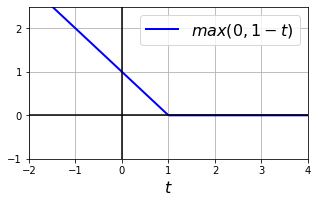

In [49]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
#save_fig("hinge_plot")
plt.show()

在线SVM也可以实现核技巧，可参考“Incremental and Decremental SVM Learning”（ http://goo.gl/JEqVui ） [4] ，以及“Fast Kernel Classifiers with Online and Active Learning”（ https://goo.gl/hsoUHA ） [5] 。但是这些是在Matlab和C++上实现的。对于大规模非线性问题，可能需要使用神经网络（本书第二部分）。

[1] Zeta（$\zeta$）是希腊字母的第8个字母。

[2] 要了解更多关于二次规划的信息，可以从阅读Stephen Boyd和Lieven Vandenberghe的“Convex Optimization”（剑桥大学出版社，2004年）开始，或者是观看Richard Brown的系列讲座。

[3] 目标函数是凸函数，并且不等式约束是连续可微的凸函数。

[4] “Incremental and Decremental Support Vector Machine Learning”G.Cauwenberghs，T.Poggio（2001）.

[5] “Fast Kernel Classifiers with Online and Active Learning“A.Bordes，S.Ertekin，J.Weston，L.Bottou（2005）.

## 练习

1.支持向量机的基本思想是什么？

生成分隔，以使不同类别的数据的分隔区间最大。决策边界之间的间隔最大化，从而分隔出两个类别的训练实例。
> 注意软间隔和硬间隔的区别

2.什么是支持向量？

位于间隔边缘的实例叫做支持向量。决策边界完全由支持向量决定。

3.使用SVM时，对输入值进行缩放为什么重要？

训练集如果不进行缩放，SVM将趋于忽略值较小的特征。

4.SVM分类器在对实例进行分类时，会输出信心分数么？概率呢？

课本讲述是“不会”，答案给出了输出方法。
支持向量机分类器能够输出测试实例与决策边界之间的距离，你可以将其用作信心分数。但是这个分数不能直接转化成类别概率的估算。如果创建SVM时，在Scikit-Learn中设置`probability=True`，那么训练完成后，算法将使用逻辑回归对SVM分数进行校准（对训练数据额外进行5-折交叉验证的训练），从而得到概率值。这会给SVM添加`predict_proba()`和`predict_log_proba()`两种方法。

5.如果训练集有上千万个实例和几百个特征，你应该使用SVM原始问题还是对偶问题来训练模型？

特征大于实例时可以使用对偶问题。
具有超高数量的实例时使用原始问题，对偶问题会非常慢。

6.假设你用RBF核训练了一个SVM分类器，看起来似乎对训练集拟合不足，你应该提升还是降低$\gamma$（gamma）？C呢？

如果一个使用RBF核训练的支持向量机对训练集拟合不足，可能是由于过度正则化导致的。需要提升$\gamma$或C（或同时提升二者）来降低正则化。

7.如果使用现成二次规划求解器，你应该如何设置QP参数（H、f、A和b），来解决软间隔线性SVM分类器问题？



8.在一个线性可分离数据集上训练LinearSVC。然后在同一数据集上训练SVC和SGDClassifier。看看你是否可以用它们产出大致相同的模型。

9.在MNIST数据集上训练SVM分类器。由于SVM分类器是个二元分类器，所以你需要使用一对多来为10个数字进行分类。你可能还需要使用小型验证集来调整超参数以加快进度。最后看看达到的精度是多少？

In [13]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target,    
                                                    test_size=0.3,random_state=55)

In [6]:
X_train.shape, y_train.shape
X_test.shape

((49000, 784), (49000,))

(21000, 784)

In [8]:
lin_clf = LinearSVC()
lin_clf.fit(X_train, y_train)

/home/zhuangbin/pyenv/jupyter/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [12]:
y_pred = lin_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8587142857142858

In [23]:
# 数据归一化的影响
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
lin_clf.fit(X_train_scaled, y_train)

/home/zhuangbin/pyenv/jupyter/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [24]:
y_pred = lin_clf.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9025714285714286

In [27]:
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [28]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9607619047619048

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:2000], y_train[:2000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.675631409696784, gamma=0.001959341573669738 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.675631409696784, gamma=0.001959341573669738, total=   4.3s
[CV] C=8.675631409696784, gamma=0.001959341573669738 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] .. C=8.675631409696784, gamma=0.001959341573669738, total=   4.3s
[CV] C=8.675631409696784, gamma=0.001959341573669738 .................
[CV] .. C=8.675631409696784, gamma=0.001959341573669738, total=   4.4s
[CV] C=7.062774690024186, gamma=0.007196881003877813 .................
[CV] .. C=7.062774690024186, gamma=0.007196881003877813, total=   6.5s
[CV] C=7.062774690024186, gamma=0.007196881003877813 .................
[CV] .. C=7.062774690024186, gamma=0.007196881003877813, total=   6.5s
[CV] C=7.062774690024186, gamma=0.007196881003877813 .................
[CV] .. C=7.062774690024186, gamma=0.007196881003877813, total=   6.5s
[CV] C=1.961316160855411, gamma=0.007337313808432687 .................
[CV] .. C=1.961316160855411, gamma=0.007337313808432687, total=   6.5s
[CV] C=1.961316160855411, gamma=0.007337313808432687 .................
[CV] .. C=1.961316160855411, gamma=0.007337313808432687, total=   6.3s
[CV] C=1.961316160855411, gamma=0.007337313808432687 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81b3d67b80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81b3e0be80>},
                   verbose=2)

In [36]:
rnd_search_cv.best_estimator_

SVC(C=1.5177228349411855, gamma=0.0012225102128268247)

In [37]:
rnd_search_cv.best_score_

0.9019987003495249

In [38]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=1.5177228349411855, gamma=0.0012225102128268247)

In [39]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9891224489795918

In [40]:
# 结果也是相当魔性，训练数据多算出来的得分高的模型，还没有得分低的模型的准确率高
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9636666666666667

10.在加州住房数据集上训练一个SVM回归模型。

In [41]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=55)

In [45]:
from sklearn.svm import SVR
svr = SVR()

In [46]:
svr.fit(X_train, y_train)

SVR()

In [47]:
y_pred = svr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

1.3718536485909136